In [1]:
import numpy as np
import pandas as pd

In [123]:
df=pd.read_csv('train_titanic.csv')
df.head()

df1=pd.read_csv('test_titanic.csv')


In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
len(df['Cabin'])

891

In [28]:
df=df.drop('Cabin',axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [31]:
df=df.drop(['Name','Ticket'],axis=1)

In [35]:
df=df.drop('PassengerId',axis=1)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [43]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [47]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Nominal_Category')

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,True,False,False
2,1,3,female,26.0,0,0,7.9250,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True


In [49]:
df = pd.get_dummies(df, columns=['Sex'])

In [64]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [51]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

In [56]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S,Sex_female,Sex_male
0,0,2,22.0,1,0,7.2500,False,False,True,False,True
1,1,0,38.0,1,0,71.2833,True,False,False,True,False
2,1,2,26.0,0,0,7.9250,False,False,True,True,False
3,1,0,35.0,1,0,53.1000,False,False,True,True,False
4,0,2,35.0,0,0,8.0500,False,False,True,False,True


In [66]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale= ['Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
x[columns_to_scale] = pd.DataFrame(scaler.fit_transform(x[columns_to_scale]))

In [67]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S,Sex_female,Sex_male
0,2,0.271174,0.125,0.0,0.014151,False,False,True,False,True
1,0,0.472229,0.125,0.0,0.139136,True,False,False,True,False
2,2,0.321438,0.000,0.0,0.015469,False,False,True,True,False
3,0,0.434531,0.125,0.0,0.103644,False,False,True,True,False
4,2,0.434531,0.000,0.0,0.015713,False,False,True,False,True


In [70]:
x.corr()

,Pclass,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S,Sex_female,Sex_male
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.131900,0.131900
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.014665,-0.081163,0.081163
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.114631,-0.114631
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.245489,-0.245489
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.182333,-0.182333
Nominal_Category_C,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.082853,-0.082853
Nominal_Category_Q,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.074115,-0.074115
Nominal_Category_S,0.081720,-0.014665,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.125722,0.125722
Sex_female,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.125722,1.000000,-1.000000
Sex_male,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,-1.000000,1.000000


<Axes: >

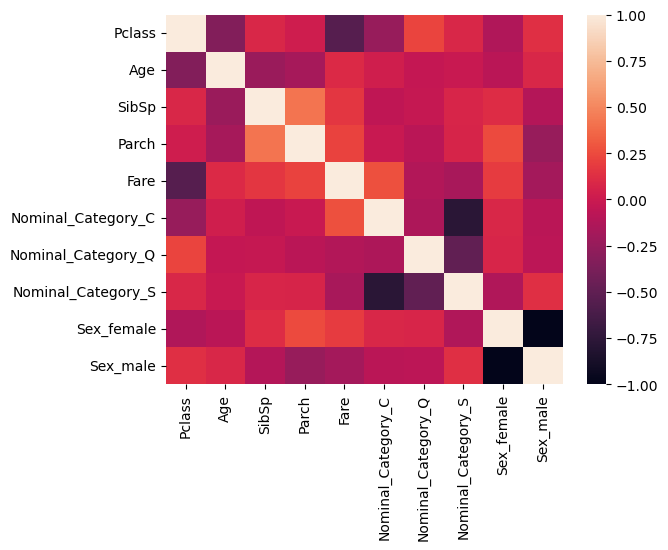

In [72]:
import seaborn as sns
sns.heatmap(x.corr(),linecolor='')

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75,stratify=y)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.78
Confusion Matrix:
[[118  19]
 [ 29  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.75      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [77]:
from sklearn.svm import SVC

In [83]:
svm_classifier = SVC(kernel='rbf', C=100.0)

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.80

Confusion Matrix:
[[130   7]
 [ 38  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       137
           1       0.87      0.56      0.68        86

    accuracy                           0.80       223
   macro avg       0.82      0.75      0.77       223
weighted avg       0.81      0.80      0.79       223



In [ ]:
#time to see test on the unseen data

In [85]:
df1=pd.read_csv('test_titanic.csv')
df1=df1.drop(['Name','Ticket'],axis=1)
df1=df1.drop('Cabin',axis=1)

columns_to_scale= ['Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
df1[columns_to_scale] = pd.DataFrame(scaler.fit_transform(df1[columns_to_scale]))

label_encoder = LabelEncoder()
df1['Pclass'] = label_encoder.fit_transform(df1['Pclass'])
df1 = pd.get_dummies(df1, columns=['Embarked'], prefix='Nominal_Category')

In [86]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)

In [91]:
columns_to_scale= ['Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
df1[columns_to_scale] = pd.DataFrame(scaler.fit_transform(df1[columns_to_scale]))

df1=df1.drop('PassengerId',axis=1)

In [93]:
df1 = pd.get_dummies(df1, columns=['Sex'])

In [94]:
df1.head()

,Pclass,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S,Sex_female,Sex_male
0,2,0.452723,0.000,0.000000,0.015282,False,True,False,False,True
1,2,0.617566,0.125,0.000000,0.013663,False,False,True,True,False
2,1,0.815377,0.000,0.000000,0.018909,False,True,False,False,True
3,2,0.353818,0.000,0.000000,0.016908,False,False,True,False,True
4,2,0.287881,0.125,0.111111,0.023984,False,False,True,True,False


In [90]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Nominal_Category_C,Nominal_Category_Q,Nominal_Category_S,Sex_female,Sex_male
0,2,0.271174,0.125,0.0,0.014151,False,False,True,False,True
1,0,0.472229,0.125,0.0,0.139136,True,False,False,True,False
2,2,0.321438,0.000,0.0,0.015469,False,False,True,True,False
3,0,0.434531,0.125,0.0,0.103644,False,False,True,True,False
4,2,0.434531,0.000,0.0,0.015713,False,False,True,False,True


In [ ]:
df1.isna().sum()
df1['Fare'].fillna(df1['Fare'].mean(),inplace=True)

In [102]:
y_pred=svm_classifier.predict(df1)

In [104]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
y_pred=pd.DataFrame(y_pred)

In [112]:
y_pred=y_pred.rename(columns={0: 'Survived'})

In [128]:
y_pred.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896


In [115]:
len(y_pred)

418

In [127]:
y_pred['PassengerId'] = df1['PassengerId']

In [124]:
len(df1['PassengerId'])

418

In [129]:
y_pred.to_csv('y_pred.csv', index=False)